<a href="https://colab.research.google.com/github/Arnajakk/BIA_Project/blob/main/GOOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using CNN-LSTM model

In [1]:
import numpy as np 
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing and Analysis

In [3]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [4]:
path = '/content/drive/MyDrive/BI Project/predictive/18 Symbols'
stock_name = 'GOOG'
raw_data = pd.read_csv(path+'/'+stock_name+'.csv')
data = raw_data[:755]
data2 = raw_data[755:]
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB


In [6]:
raw_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1.007000e+03
mean,1571.121068,1587.312004,1556.258047,1572.463549,1572.463549,1.578790e+06
std,595.126225,599.066714,591.257684,595.484649,595.484649,7.039294e+05
min,973.900024,1003.539978,970.109985,976.219971,976.219971,3.468000e+05
25%,1137.909973,1147.772461,1127.177002,1139.304993,1139.304993,1.129800e+06
50%,1292.890015,1304.300049,1281.000000,1295.280029,1295.280029,1.408900e+06
75%,1778.969971,1798.229980,1760.270020,1781.575012,1781.575012,1.815750e+06
max,3020.000000,3037.000000,2997.750000,3014.179932,3014.179932,6.207000e+06


In [7]:
raw_data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

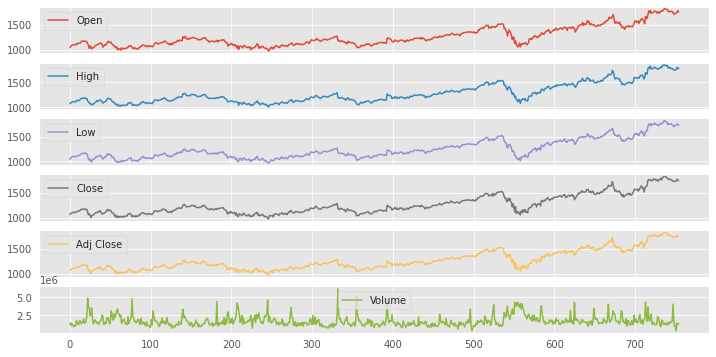

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


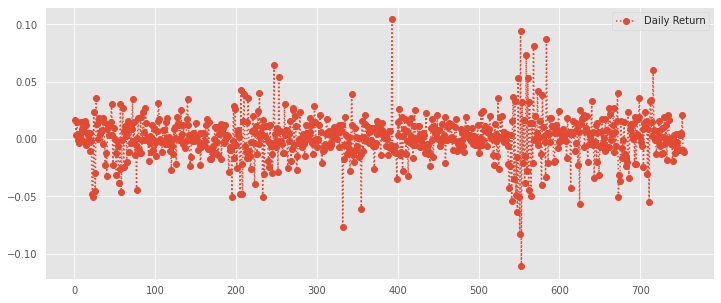

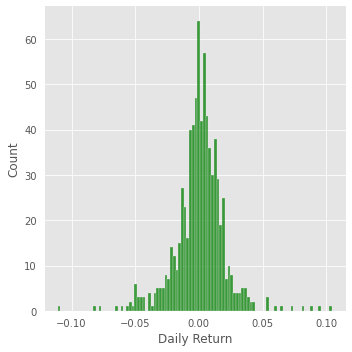

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


           Date         Open         High          Low        Close  \
0    2018-01-02  1048.339966  1066.939941  1045.229980  1065.000000   
1    2018-01-03  1064.310059  1086.290039  1063.209961  1082.479980   
2    2018-01-04  1088.000000  1093.569946  1084.001953  1086.400024   
3    2018-01-05  1094.000000  1104.250000  1092.000000  1102.229980   
4    2018-01-08  1102.229980  1111.270020  1101.619995  1106.939941   
..          ...          ...          ...          ...          ...   
750  2020-12-23  1728.109985  1747.989990  1725.040039  1732.380005   
751  2020-12-24  1735.000000  1746.000000  1729.109985  1738.849976   
752  2020-12-28  1751.635010  1790.728027  1746.334961  1776.089966   
753  2020-12-29  1787.790039  1792.439941  1756.089966  1758.719971   
754  2020-12-30  1762.010010  1765.094971  1725.599976  1739.520020   

       Adj Close   Volume  MA for 10 days  MA for 50 days  MA for 100 days  \
0    1065.000000  1237600     1258.946306     1248.689932      1241.1

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

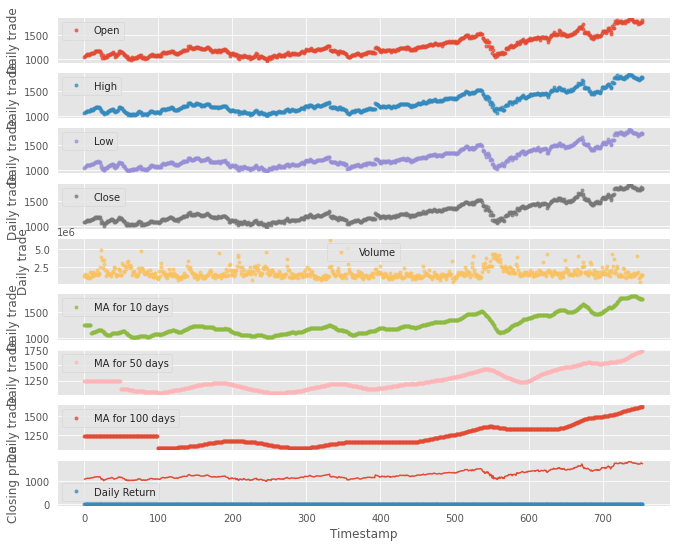

In [8]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

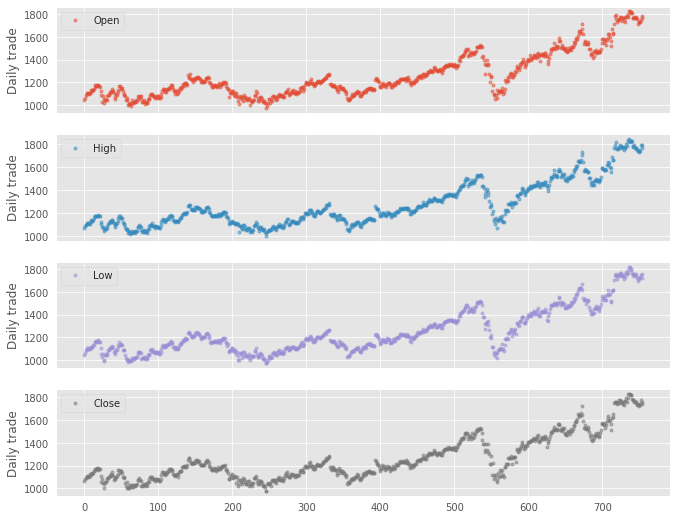

In [9]:
# After that, we'll visualize the data for understanding, this is shown below...
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

           Date         Open         High          Low        Close  \
0    2018-01-02  1048.339966  1066.939941  1045.229980  1065.000000   
1    2018-01-03  1064.310059  1086.290039  1063.209961  1082.479980   
2    2018-01-04  1088.000000  1093.569946  1084.001953  1086.400024   
3    2018-01-05  1094.000000  1104.250000  1092.000000  1102.229980   
4    2018-01-08  1102.229980  1111.270020  1101.619995  1106.939941   
..          ...          ...          ...          ...          ...   
750  2020-12-23  1728.109985  1747.989990  1725.040039  1732.380005   
751  2020-12-24  1735.000000  1746.000000  1729.109985  1738.849976   
752  2020-12-28  1751.635010  1790.728027  1746.334961  1776.089966   
753  2020-12-29  1787.790039  1792.439941  1756.089966  1758.719971   
754  2020-12-30  1762.010010  1765.094971  1725.599976  1739.520020   

       Adj Close   Volume  MA for 10 days  MA for 50 days  MA for 100 days  \
0    1065.000000  1237600     1258.946306     1248.689932      1241.1

,count,mean,std,min,25%,50%,75%,max
Open,755.0,1.259899e+03,197.372443,973.900024,1.110685e+03,1.195330e+03,1.391440e+03,1.824520e+03
High,755.0,1.273767e+03,199.472437,1003.539978,1.123825e+03,1.204780e+03,1.412170e+03,1.847200e+03
Low,755.0,1.247030e+03,196.049849,970.109985,1.099970e+03,1.186630e+03,1.378076e+03,1.822650e+03
Close,755.0,1.260845e+03,197.708740,976.219971,1.111295e+03,1.197000e+03,1.393775e+03,1.827990e+03
Adj Close,755.0,1.260845e+03,197.708740,976.219971,1.111295e+03,1.197000e+03,1.393775e+03,1.827990e+03
Volume,755.0,1.683591e+06,731921.294056,346800.000000,1.234850e+06,1.494000e+06,1.889050e+06,6.207000e+06
MA for 10 days,755.0,1.258946e+03,191.616504,1016.841003,1.112805e+03,1.196477e+03,1.384189e+03,1.803223e+03
MA for 50 days,755.0,1.248690e+03,162.293326,1048.844399,1.121686e+03,1.201187e+03,1.343308e+03,1.730207e+03
MA for 100 days,755.0,1.241152e+03,135.876768,1074.950599,1.148600e+03,1.214328e+03,1.332070e+03,1.631823e+03
Daily Return,755.0,8.392239e-04,0.019385,-0.111008,-7.028870e-03,1.348030e-03,1.098197e-02,1.044854e-01


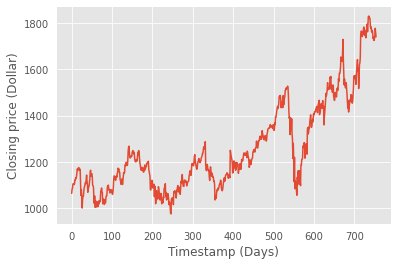

In [10]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp (Days)")
plt.ylabel("Closing price (Dollar)")
df = data
print(df)

df.describe().transpose()

In [11]:
# The data has been analysed but it must be converted into data of shape [100,1] 
# to make it easier for CNN to train on... Else it won't select necessary features and the model will fail
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

522
131


# Training

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [12]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
14/14 [==============================] - 12s 186ms/step - loss: 0.0124 - mse: 0.0124 - mae: 0.0887 - val_loss: 0.0070 - val_mse: 0.0070 - val_mae: 0.0671
Epoch 2/40
14/14 [==============================] - 1s 45ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0690 - val_loss: 0.0050 - val_mse: 0.0050 - val_mae: 0.0522
Epoch 3/40
14/14 [==============================] - 1s 42ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0596 - val_loss: 0.0043 - val_mse: 0.0043 - val_mae: 0.0477
Epoch 4/40
14/14 [==============================] - 1s 46ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0579 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0429
Epoch 5/40
14/14 [==============================] - 1s 47ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0511 - val_loss: 0.0032 - val_mse: 0.0032 - val_mae: 0.0421
Epoch 6/40
14/14 [==============================] - 1s 43ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0454 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0405
Epoch 7/40
14/14 [==

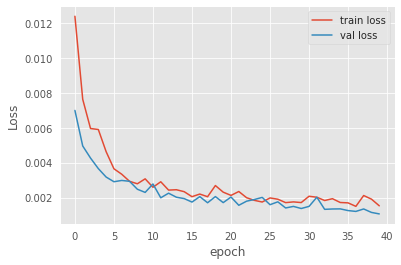

In [13]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

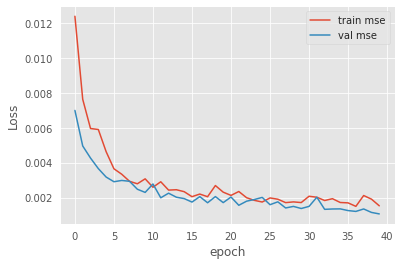

In [14]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

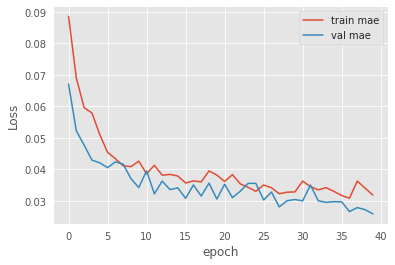

In [15]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [16]:
model.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 8ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0258    


[0.0010622073896229267, 0.0010622073896229267, 0.025832824409008026]

In [17]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.926666
R2 Score: 0.926666
Max Error: 0.101425


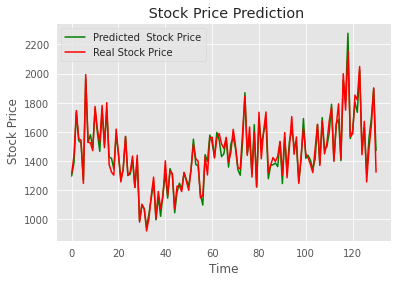

In [18]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing

In [19]:
# First we need to save a model
model.save("model.h5")

In [20]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [21]:
df2 = raw_data[655:]
X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.99, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2
248


In [22]:
model.evaluate(test_X, test_Y)

8/8 [==============================] - 0s 10ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0622


[0.005351197440177202, 0.005351197440177202, 0.0622299462556839]

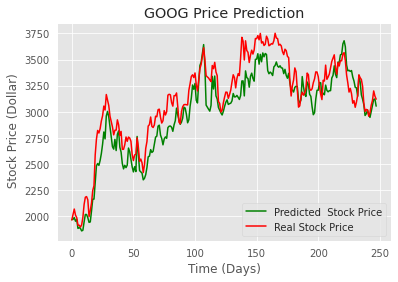

In [23]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(stock_name+' Price Prediction')
plt.xlabel('Time (Days)')
plt.ylabel(' Stock Price (Dollar)')
plt.legend()
plt.show()